# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings


In [3]:
# Import the libraries you will be using for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [7]:
# Try loading one file

# df = pd.read_parquet('2023-1.parquet')
# df.info()
df=pd.read_parquet(r"C:\Users\KRISHNA\Downloads\Datasets\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records\2023-1.parquet")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [9]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
folder_path = r"C:\Users\KRISHNA\Downloads\Datasets\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records"
os.chdir(folder_path)

# Create a list of all the twelve files to read
file_list = os.listdir(folder_path)

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(folder_path, file_name)

        # Reading the current file
        month_data=pd.read_parquet(file_path)
        month_data['date']=month_data['tpep_pickup_datetime'].dt.date
        month_data['hour']=month_data['tpep_pickup_datetime'].dt.hour


        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in month_data['date'].unique():
            df_date=month_data[month_data['date']==date]
            # Iterate through each hour of the selected date        
            for hour in range(24):
                df_hour=df_date[df_date['hour']==hour]
                # Sample 5% of the hourly data randomly
                if df_hour.shape[0]>0:
                    sample=df_hour.sample(frac = 0.05, random_state = 42)
                # add data of this hour to the dataframe
                    sampled_data=pd.concat([sampled_data,sample]).reset_index(drop=True)
        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df,sampled_data])# we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [85]:
if len(df)>300000:
    df=df.groupby(['date','hour'], group_keys=False).sample(frac = 300000/len(df), random_state = 42)
# Store the df in csv/parquet
# df.to_parquet('')
df.to_csv(r"C:\Users\KRISHNA\Downloads\Datasets\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records\df_merged.csv", index=False)

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [587]:
# Load the new data file
df=pd.read_csv(r"C:\Users\KRISHNA\Downloads\Datasets\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records\df_merged.csv")

In [589]:
# df.head()
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2023-01-01 00:54:15   2023-01-01 01:01:43              1.0   
1         2  2023-01-01 00:20:37   2023-01-01 00:33:43              1.0   
2         2  2023-01-01 00:42:30   2023-01-01 00:58:00              1.0   
3         1  2023-01-01 00:18:33   2023-01-01 00:54:44              1.0   
4         1  2023-01-01 00:15:25   2023-01-01 00:22:35              2.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.30         1.0                  N            90           211   
1           5.35         1.0                  N           236           244   
2           4.13         1.0                  N            79           236   
3          21.00         2.0                  N           132           238   
4           0.90         1.0                  N           148           114   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             1  ...      0.5        2.85          0.00   
1             1  ...      0.5        5.66          0.00   
2             1  ...      0.5        4.96          0.00   
3             1  ...      0.5        0.00          6.55   
4             1  ...      0.5        1.00          0.00   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         17.15                   2.5         0.00   
1                    1.0         33.96                   2.5         0.00   
2                    1.0         29.76                   2.5         0.00   
3                    1.0         81.80                   2.5         1.25   
4                    1.0         13.90                   2.5         0.00   

         date  hour Airport_fee  
0  2023-01-01     0         NaN  
1  2023-01-01     0         NaN  
2  2023-01-01     0         NaN  
3  2023-01-01     0         NaN  
4  2023-01-01     0         NaN  

[5 rows x 22 columns]

In [126]:
# df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300050 entries, 0 to 300049
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               300050 non-null  int64  
 1   tpep_pickup_datetime   300050 non-null  object 
 2   tpep_dropoff_datetime  300050 non-null  object 
 3   passenger_count        289685 non-null  float64
 4   trip_distance          300050 non-null  float64
 5   RatecodeID             289685 non-null  float64
 6   store_and_fwd_flag     289685 non-null  object 
 7   PULocationID           300050 non-null  int64  
 8   DOLocationID           300050 non-null  int64  
 9   payment_type           300050 non-null  int64  
 10  fare_amount            300050 non-null  float64
 11  extra                  300050 non-null  float64
 12  mta_tax                300050 non-null  float64
 13  tip_amount             300050 non-null  float64
 14  tolls_amount           300050 non-nu

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [591]:
# Fix the index and drop any columns that are not needed
df.rename(columns={'hour': 'pickup_hour'},inplace=True)
df.drop(columns=['store_and_fwd_flag','date'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300050 entries, 0 to 300049
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               300050 non-null  int64  
 1   tpep_pickup_datetime   300050 non-null  object 
 2   tpep_dropoff_datetime  300050 non-null  object 
 3   passenger_count        289685 non-null  float64
 4   trip_distance          300050 non-null  float64
 5   RatecodeID             289685 non-null  float64
 6   PULocationID           300050 non-null  int64  
 7   DOLocationID           300050 non-null  int64  
 8   payment_type           300050 non-null  int64  
 9   fare_amount            300050 non-null  float64
 10  extra                  300050 non-null  float64
 11  mta_tax                300050 non-null  float64
 12  tip_amount             300050 non-null  float64
 13  tolls_amount           300050 non-null  float64
 14  improvement_surcharge  300050 non-nu

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [593]:
# Combine the two airport fee columns
df['Airport_Fee']=df['airport_fee'].fillna(0)+df['Airport_fee'].fillna(0)
df.drop(columns=['airport_fee','Airport_fee'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300050 entries, 0 to 300049
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               300050 non-null  int64  
 1   tpep_pickup_datetime   300050 non-null  object 
 2   tpep_dropoff_datetime  300050 non-null  object 
 3   passenger_count        289685 non-null  float64
 4   trip_distance          300050 non-null  float64
 5   RatecodeID             289685 non-null  float64
 6   PULocationID           300050 non-null  int64  
 7   DOLocationID           300050 non-null  int64  
 8   payment_type           300050 non-null  int64  
 9   fare_amount            300050 non-null  float64
 10  extra                  300050 non-null  float64
 11  mta_tax                300050 non-null  float64
 12  tip_amount             300050 non-null  float64
 13  tolls_amount           300050 non-null  float64
 14  improvement_surcharge  300050 non-nu

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [595]:
# check where values of fare amount are negative
(df['fare_amount']<0).any()

False

Did you notice something different in the `RatecodeID` column for above records?

In [1031]:
# Analyse RatecodeID for the negative fare amounts
(df['RatecodeID']<0).any()

False

In [599]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'pickup_hour', 'Airport_Fee'],
      dtype='object')

In [601]:
# Find which columns have negative values
numbers=df.select_dtypes(exclude=['object'])
negative_values=(numbers<0).any()
print(negative_values)

VendorID                 False
passenger_count          False
trip_distance            False
RatecodeID               False
PULocationID             False
DOLocationID             False
payment_type             False
fare_amount              False
extra                    False
mta_tax                   True
tip_amount               False
tolls_amount             False
improvement_surcharge     True
total_amount              True
congestion_surcharge      True
pickup_hour              False
Airport_Fee               True
dtype: bool


In [603]:
# fix these negative values
negative_cols=['mta_tax','improvement_surcharge','total_amount','congestion_surcharge','Airport_Fee']
for columns in negative_cols:
    df.loc[(df['fare_amount']==0)&(df[columns]<0), columns]=0


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [605]:
# Find the proportion of missing values in each column
df.isna().mean()


VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.034544
trip_distance            0.000000
RatecodeID               0.034544
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.034544
pickup_hour              0.000000
Airport_Fee              0.000000
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [607]:
# Display the rows with null values
df[df.isna().any(axis=1)]
# Impute NaN values in 'passenger_count'
df['passenger_count']=df['passenger_count'].replace(0,np.nan).fillna(df['passenger_count'].median())

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [609]:
# Fix missing values in 'RatecodeID'
df['RatecodeID']=df['RatecodeID'].fillna(df['RatecodeID'].median())

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [611]:
# handle null values in congestion_surcharge
df['congestion_surcharge']=df['congestion_surcharge'].fillna(df['congestion_surcharge'].median())


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [ ]:
# Handle any remaining missing values



### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [613]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
df.describe()


VendorID  passenger_count  trip_distance     RatecodeID  \
count  300050.000000    300050.000000  300050.000000  300050.000000   
mean        1.734091         1.370695       3.824957       1.593911   
std         0.447736         0.863391      71.774750       7.142428   
min         1.000000         1.000000       0.000000       1.000000   
25%         1.000000         1.000000       1.040000       1.000000   
50%         2.000000         1.000000       1.790000       1.000000   
75%         2.000000         1.000000       3.400000       1.000000   
max         6.000000         9.000000   26217.980000      99.000000   

        PULocationID   DOLocationID   payment_type    fare_amount  \
count  300050.000000  300050.000000  300050.000000  300050.000000   
mean      165.232221     164.067215       1.163286      19.814547   
std        64.116540      69.754243       0.508564      18.172182   
min         1.000000       1.000000       0.000000       0.000000   
25%       132.000000     114.000000       1.000000       9.300000   
50%       162.000000     162.000000       1.000000      13.500000   
75%       234.000000     234.000000       1.000000      21.900000   
max       265.000000     265.000000       4.000000     604.300000   

               extra        mta_tax     tip_amount   tolls_amount  \
count  300050.000000  300050.000000  300050.000000  300050.000000   
mean        1.585589       0.495345       3.546653       0.592789   
std         1.827626       0.048573       4.057155       2.176332   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.500000       1.000000       0.000000   
50%         1.000000       0.500000       2.850000       0.000000   
75%         2.500000       0.500000       4.420000       0.000000   
max        14.250000       4.000000     194.420000      83.000000   

       improvement_surcharge   total_amount  congestion_surcharge  \
count          300050.000000  300050.000000         300050.000000   
mean                0.999022      28.873161              2.314406   
std                 0.028753      22.734168              0.655394   
min                 0.000000       0.000000              0.000000   
25%                 1.000000      15.960000              2.500000   
50%                 1.000000      21.000000              2.500000   
75%                 1.000000      30.940000              2.500000   
max                 1.000000     643.000000              2.500000   

         pickup_hour    Airport_Fee  
count  300050.000000  300050.000000  
mean       14.264669       0.137571  
std         5.807130       0.456716  
min         0.000000       0.000000  
25%        11.000000       0.000000  
50%        15.000000       0.000000  
75%        19.000000       0.000000  
max        23.000000       1.750000

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [615]:
# remove passenger_count > 6
df=df[df['passenger_count']<=6]
print(df['passenger_count'].max())

6.0


In [617]:
# Continue with outlier handling
df=df[~((df['trip_distance']<=0.2)&(df['fare_amount']>=300))]

In [619]:
df = df[~((df['trip_distance'] == 0) & 
                   (df['fare_amount'] == 0) & 
                   (df['PULocationID'] != df['DOLocationID']))]

In [621]:
df = df[~(df['trip_distance'] >= 250)]

In [623]:
common_payment = df['payment_type'].mode()[0]

In [625]:
df.loc[df['payment_type'] == 0, 'payment_type'] = common_payment

In [627]:
common_Ratecode = df['RatecodeID'].mode()[0]

In [629]:
df.loc[df['RatecodeID'] == 99, 'RatecodeID'] = common_Ratecode

In [631]:
df.describe()

VendorID  passenger_count  trip_distance     RatecodeID  \
count  300014.000000    300014.000000  300014.000000  300014.000000   
mean        1.734099         1.370636       3.441392       1.071113   
std         0.447733         0.863063       4.547365       0.384828   
min         1.000000         1.000000       0.000000       1.000000   
25%         1.000000         1.000000       1.040000       1.000000   
50%         2.000000         1.000000       1.790000       1.000000   
75%         2.000000         1.000000       3.400000       1.000000   
max         6.000000         6.000000     140.240000       6.000000   

        PULocationID   DOLocationID   payment_type    fare_amount  \
count  300014.000000  300014.000000  300014.000000  300014.000000   
mean      165.231786     164.064180       1.197787      19.804697   
std        64.114230      69.752423       0.459948      18.078671   
min         1.000000       1.000000       1.000000       0.000000   
25%       132.000000     114.000000       1.000000       9.300000   
50%       162.000000     162.000000       1.000000      13.500000   
75%       234.000000     234.000000       1.000000      21.900000   
max       265.000000     265.000000       4.000000     604.300000   

               extra        mta_tax     tip_amount   tolls_amount  \
count  300014.000000  300014.000000  300014.000000  300014.000000   
mean        1.585739       0.495376       3.545687       0.592759   
std         1.827653       0.048416       4.047885       2.176007   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.500000       1.000000       0.000000   
50%         1.000000       0.500000       2.850000       0.000000   
75%         2.500000       0.500000       4.420000       0.000000   
max        14.250000       4.000000     194.420000      83.000000   

       improvement_surcharge   total_amount  congestion_surcharge  \
count          300014.000000  300014.000000         300014.000000   
mean                0.999052      28.862627              2.314575   
std                 0.028229      22.642936              0.655119   
min                 0.000000       0.000000              0.000000   
25%                 1.000000      15.960000              2.500000   
50%                 1.000000      21.000000              2.500000   
75%                 1.000000      30.940000              2.500000   
max                 1.000000     643.000000              2.500000   

         pickup_hour    Airport_Fee  
count  300014.000000  300014.000000  
mean       14.264808       0.137564  
std         5.807115       0.456703  
min         0.000000       0.000000  
25%        11.000000       0.000000  
50%        15.000000       0.000000  
75%        19.000000       0.000000  
max        23.000000       1.750000

In [344]:
# Do any columns need standardising?


Since our main goal is to perform EDA which mainly deals with the distribution and relationships between the data using univariate, bi and multivariate analysis, standardising the columns may not be necessary/can be skipped.

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [633]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'pickup_hour',
 'Airport_Fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Categorical
* `tpep_pickup_datetime`: Numerical
* `tpep_dropoff_datetime`: Numerical
* `passenger_count`: Numerical
* `trip_distance`: Numerical
* `RatecodeID`: Categorical
* `PULocationID`: Categorical
* `DOLocationID`: Categorical
* `payment_type`: Categorical
* `pickup_hour`: Numerical
* `trip_duration`: Numerical


The following monetary parameters belong in the same category, is it categorical or numerical?

* `fare_amount` Numerical
* `extra` Numerical
* `mta_tax` Numerical
* `tip_amount` Numerical
* `tolls_amount` Numerical
* `improvement_surcharge` Numerical
* `total_amount` Numerical
* `congestion_surcharge` Numerical
* `airport_fee` Numerical

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [635]:
# Find and show the hourly trends in taxi pickups
hourly_trends = df['pickup_hour'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
sns.barplot(x=hourly_trends.index, y=hourly_trends.values)
plt.title('Hourly Trends in Taxi Pickups')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='-', alpha=0.3)
plt.show()

In [637]:
# Find and show the daily trends in taxi pickups (days of the week)
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')

In [642]:
df['pickup_day'] = df['tpep_pickup_datetime'].dt.day_name()
days = df.groupby('pickup_day')['passenger_count'].sum().sort_index()
plt.figure(figsize=(10, 5))
plt.bar(days.index, days.values, color='green')
plt.title('Daily Trends in Taxi Pickups')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups')
plt.show()

In [646]:
# Show the monthly trends in pickups
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month
monthly_pickups = df['pickup_month'].value_counts().sort_index()

In [648]:
monthly_pickups.index = monthly_pickups.index.map({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October',
    11: 'November', 12: 'December'})

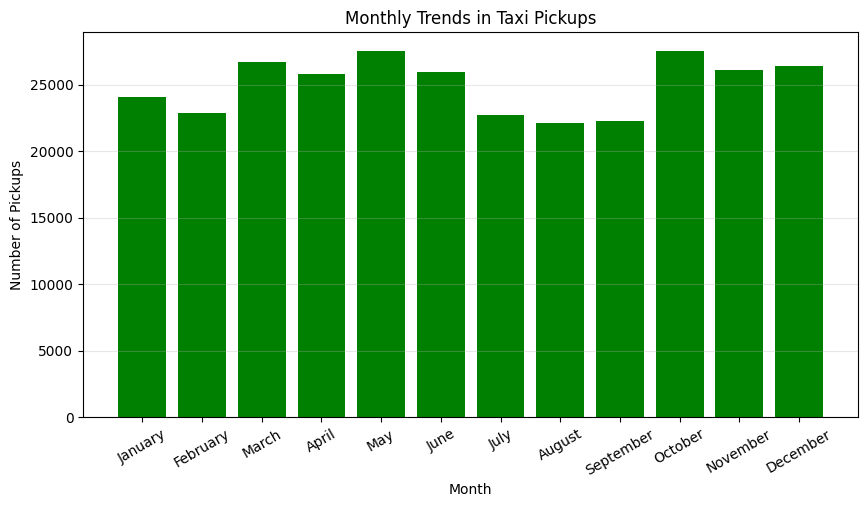

In [650]:
plt.figure(figsize=(10, 5))
plt.bar(monthly_pickups.index, monthly_pickups.values, color='green')
plt.title('Monthly Trends in Taxi Pickups')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='-', alpha=0.3)
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [652]:
# Analyse the above parameters
zero_negative_values = df[df[['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']].apply(lambda x: (x <= 0).any(), axis=1)]
print(f"these parameters contain {zero_negative_values.value_counts().sum()} zero/negative values")

these parameters contain 70229 zero/negative values


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

Yes, it is beneficial to create a copy Dataframe because parameters such as far_amount, tip_amount and total_amount contain prices and typically them having zeros does not represent any transaction happening, and also the trip distance being zero does not add to our analysis. We only need the valid data for our analysis.

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [654]:
# Create a df with non zero entries for the selected parameters.
df['trip_distance'] = df.apply(lambda x: 0.1 if x['trip_distance'] == 0 and x['PULocationID'] == x['DOLocationID'] else x['trip_distance'], axis=1)

In [656]:
copy_df = df[(df['fare_amount'] > 0)&(df['tip_amount'] > 0)&(df['total_amount'] > 0)&(df['trip_distance'] > 0)].copy()
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 230674 entries, 0 to 300049
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               230674 non-null  int64         
 1   tpep_pickup_datetime   230674 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  230674 non-null  object        
 3   passenger_count        230674 non-null  float64       
 4   trip_distance          230674 non-null  float64       
 5   RatecodeID             230674 non-null  float64       
 6   PULocationID           230674 non-null  int64         
 7   DOLocationID           230674 non-null  int64         
 8   payment_type           230674 non-null  int64         
 9   fare_amount            230674 non-null  float64       
 10  extra                  230674 non-null  float64       
 11  mta_tax                230674 non-null  float64       
 12  tip_amount             230674 non-null  float64  

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [658]:
# Group data by month and analyse monthly revenue
monthly_revenue=copy_df.groupby('pickup_month')['total_amount'].sum()
plt.figure(figsize=(10, 5))
plt.bar(monthly_revenue.index.map({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October',
    11: 'November', 12: 'December'}), monthly_revenue.values)
plt.xlabel('Month')
plt.ylabel('Total Revenue in $')
plt.title('Monthly Revenue')
plt.xticks(range(0, 13),rotation=45)
plt.grid(axis='y', linestyle='-', alpha=0.3)
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

C:\Users\KRISHNA\AppData\Local\Temp\ipykernel_4872\1238185164.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quarterly_revenue = copy_df.groupby('quarter')['total_amount'].sum()


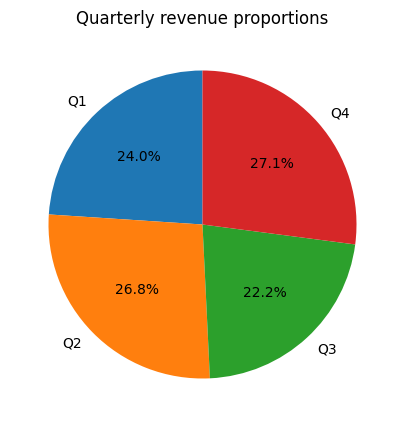

In [660]:
# Calculate proportion of each quarter
copy_df['quarter'] = pd.cut(copy_df['pickup_month'],[0, 3, 6, 9, 12], labels=["Q1", "Q2", "Q3", "Q4"])
quarterly_revenue = copy_df.groupby('quarter')['total_amount'].sum()
revenue_prop=(quarterly_revenue / quarterly_revenue.sum()) * 100
plt.figure(figsize=(10, 5))
plt.pie(revenue_prop, labels=revenue_prop.index,autopct='%1.1f%%',startangle=90)
plt.title("Quarterly revenue proportions")
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

In [662]:
# Show how trip fare is affected by distance

plt.figure(figsize=(10, 5))
plt.scatter(copy_df['trip_distance'], copy_df['fare_amount'], alpha=0.5)
plt.title('Relationship Between Trip Distance and Fare Amount')
plt.xlabel('Trip Distance in miles')
plt.ylabel('Fare Amount in $')
plt.show()

In [664]:
correlation_value = copy_df['trip_distance'].corr(copy_df['fare_amount'])
correlation_value

0.9337451958659436

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [666]:
# Show relationship between fare and trip duration
copy_df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
copy_df['trip_duration'] = (copy_df['tpep_dropoff_datetime'] - copy_df['tpep_pickup_datetime']).dt.total_seconds() / 60

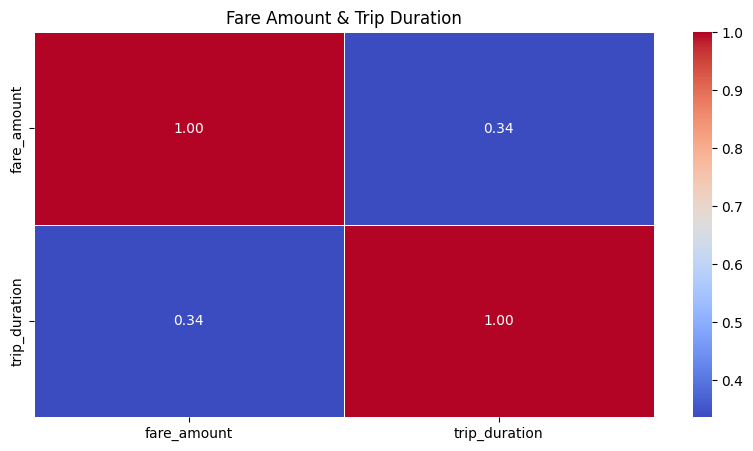

In [668]:
plt.figure(figsize=(10, 5))
sns.heatmap(copy_df[['fare_amount', 'trip_duration']].corr(), annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Fare Amount & Trip Duration')
plt.show()

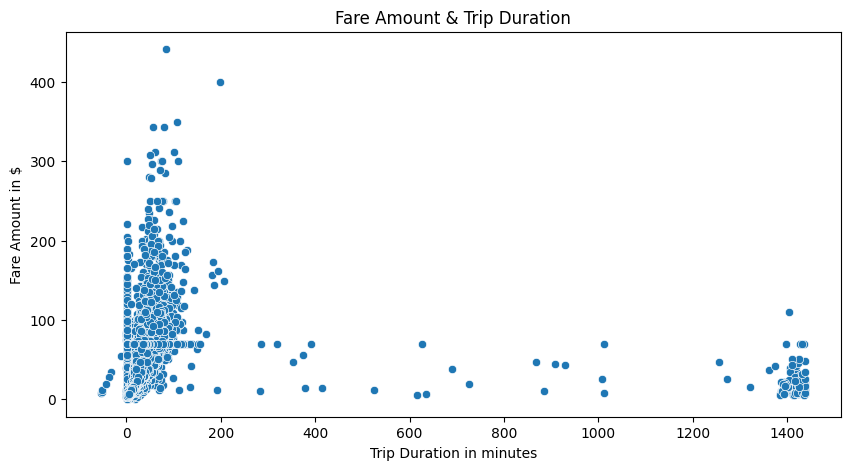

In [670]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='trip_duration', y='fare_amount', data=copy_df)
plt.title('Fare Amount & Trip Duration')
plt.xlabel('Trip Duration in minutes')
plt.ylabel('Fare Amount in $')
plt.show()

In [672]:
# Show relationship between fare and number of passengers
plt.figure(figsize=(10, 5))
sns.heatmap(copy_df[['fare_amount', 'passenger_count']].corr(), annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Fare Amount & passenger count')
plt.show()


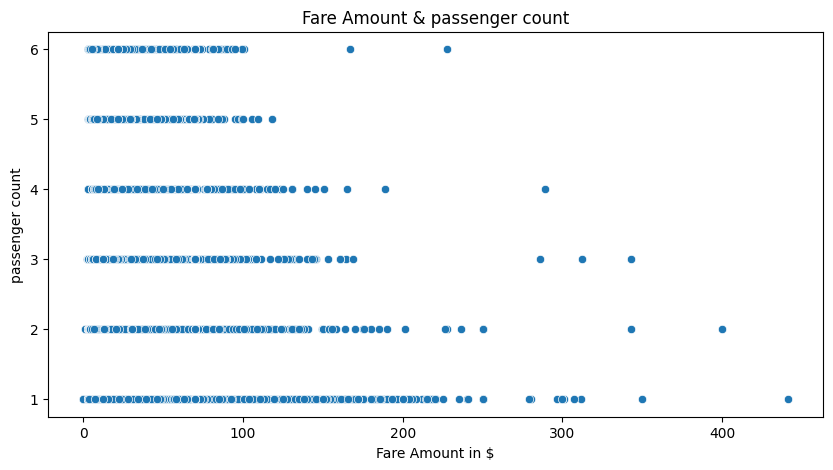

In [674]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='fare_amount', y='passenger_count', data=copy_df)
plt.title('Fare Amount & passenger count')
plt.xlabel('Fare Amount in $')
plt.ylabel('passenger count')
plt.show()

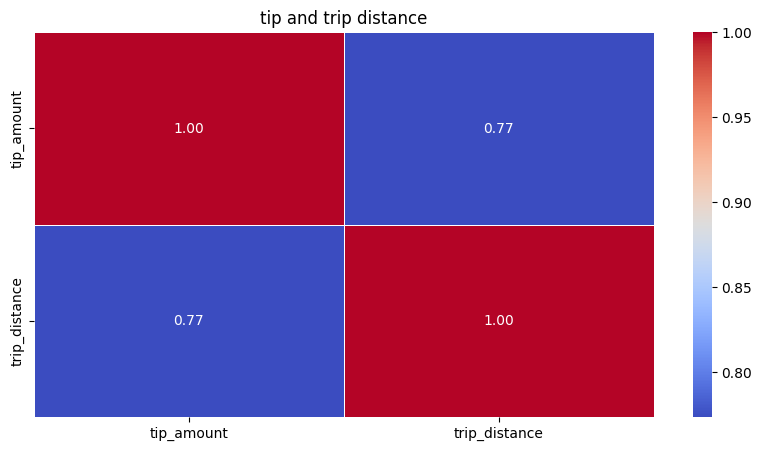

In [676]:
# Show relationship between tip and trip distance

plt.figure(figsize=(10, 5))
sns.heatmap(copy_df[['tip_amount', 'trip_distance']].corr(), annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('tip and trip distance')
plt.show()

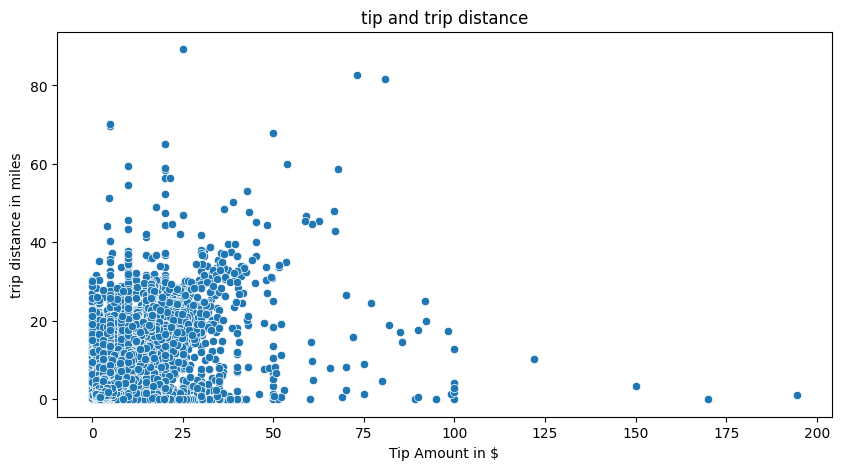

In [680]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='tip_amount', y='trip_distance', data=copy_df)
plt.title('tip and trip distance')
plt.xlabel('Tip Amount in $')
plt.ylabel('trip distance in miles')
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

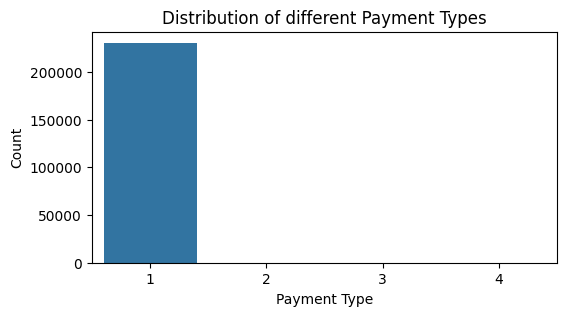

In [682]:
# Analyse the distribution of different payment types (payment_type).

plt.figure(figsize=(6, 3))
sns.countplot(x='payment_type', data=copy_df)
plt.title('Distribution of different Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.show()


In [684]:
payment_type_counts = df['payment_type'].value_counts()
payment_type_counts

payment_type
1    246431
2     50004
4      2177
3      1402
Name: count, dtype: int64

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [686]:
# !pip install geopandas
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [922]:
# import geopandas as gpd
import geopandas as gpd

# Read the shapefile using geopandas
zones = gpd.read_file(r"C:\Users\KRISHNA\Downloads\Datasets\Datasets and Dictionary-NYC\Datasets and Dictionary\taxi_zones\taxi_zones.shp")# read the .shp file using gpd
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

In [924]:
# print(zones.info())
# zones.plot()
zones.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB


<Axes: >

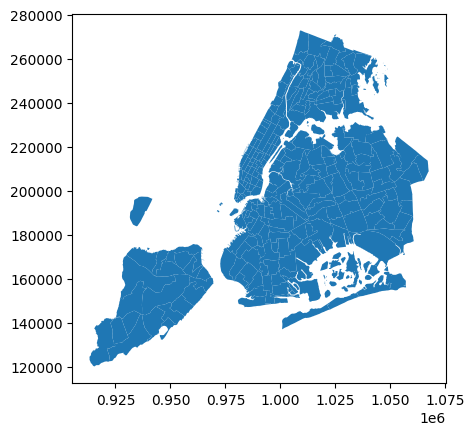

In [926]:
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [928]:
# Merge zones and trip records using locationID and PULocationID
zones_df = pd.merge(copy_df, zones, how='left', left_on='PULocationID', right_on='LocationID')
zones_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230684 entries, 0 to 230683
Data columns (total 30 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               230684 non-null  int64         
 1   tpep_pickup_datetime   230684 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  230684 non-null  datetime64[ns]
 3   passenger_count        230684 non-null  float64       
 4   trip_distance          230684 non-null  float64       
 5   RatecodeID             230684 non-null  float64       
 6   PULocationID           230684 non-null  int64         
 7   DOLocationID           230684 non-null  int64         
 8   payment_type           230684 non-null  int64         
 9   fare_amount            230684 non-null  float64       
 10  extra                  230684 non-null  float64       
 11  mta_tax                230684 non-null  float64       
 12  tip_amount             230684 non-null  floa

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [930]:
# Group data by location and calculate the number of trips
number_of_trips=zones_df.groupby('LocationID').size().reset_index(name='trip_counts')
number_of_trips.head()

LocationID  trip_counts
0         1.0           19
1         4.0          256
2         6.0            1
3         7.0           61
4         9.0            1

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [932]:
# Merge trip counts back to the zones GeoDataFrame
df1 = zones.merge(number_of_trips, how='left',on='LocationID')
df1.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   OBJECTID     263 non-null    int32   
 1   Shape_Leng   263 non-null    float64 
 2   Shape_Area   263 non-null    float64 
 3   zone         263 non-null    object  
 4   LocationID   263 non-null    int32   
 5   borough      263 non-null    object  
 6   geometry     263 non-null    geometry
 7   trip_counts  181 non-null    float64 
dtypes: float64(3), geometry(1), int32(2), object(2)
memory usage: 14.5+ KB


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

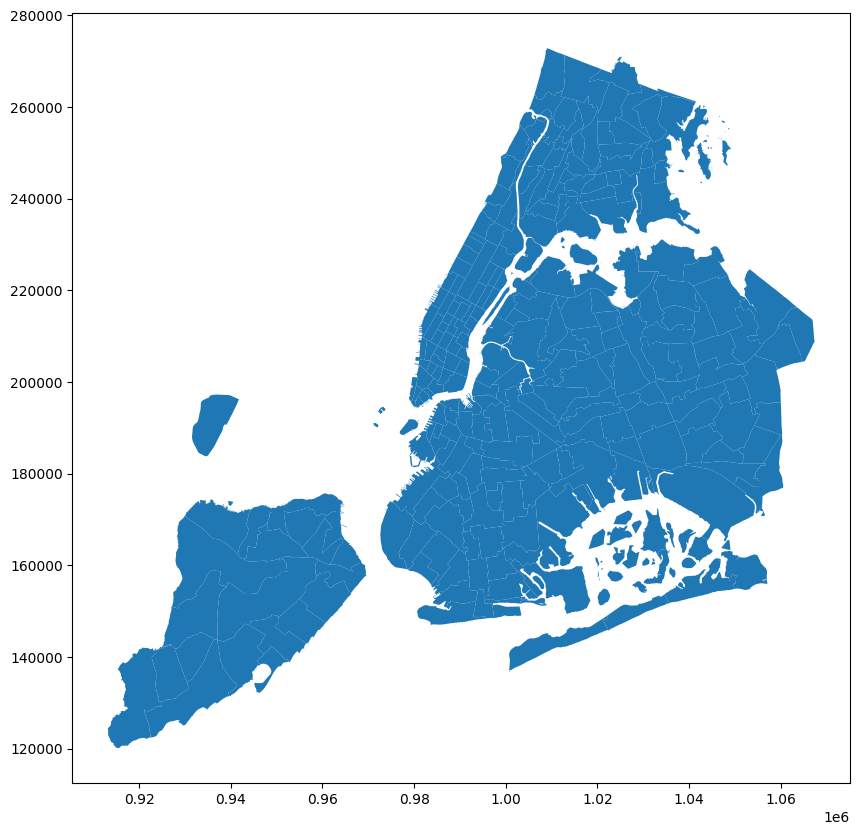

In [934]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the map and display it
df1.plot(ax=ax, legend=True)
plt.show()

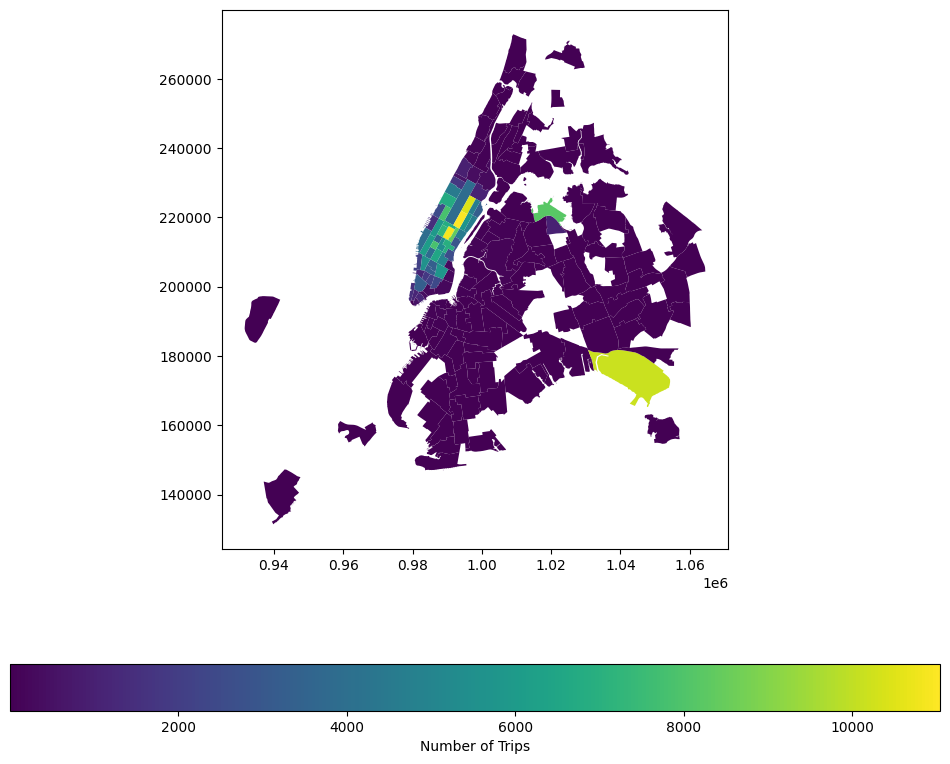

In [936]:
# can you try displaying the zones DF sorted by the number of trips?
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
df1.plot(column='trip_counts', ax=ax, legend=True, legend_kwds={'label': "Number of Trips", 'orientation': 'horizontal'})
plt.show()

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


- The busiest hours are between 15 and 19 hours, days being wednesday to saturday, and months being march to june and october to december.
- More revenue was generated in Q2 and Q4, with May and October being the highest revenue generated months respectively.
- The far amount correlates well only with the trip distance i.e fare amount is higher as the distance is high.
- Up until the distance of 40 miles, the tip amount seems to be well correlated with the distance.
- The top 10 Busiest zones are 237,161,236,132,162,138,142,186,230,170

#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [938]:
# Find routes which have the slowest speeds at different times of the day
grouped_data = zones_df.groupby(['PULocationID','DOLocationID','pickup_hour'])[['trip_distance','trip_duration']].agg(func='mean').reset_index()
grouped_data['speed'] = grouped_data['trip_distance']/ grouped_data['trip_duration']

In [940]:
slowest_speeds = grouped_data['speed'].quantile(0.10)
slow_routes = grouped_data[grouped_data['speed'] < slowest_speeds]
slow_routes

PULocationID  DOLocationID  pickup_hour  trip_distance  trip_duration  \
13                4             4            1          0.520       4.850000   
14                4             4            3          0.155       1.425000   
29                4            45           23          1.390      15.383333   
42                4            68           20          3.140    1438.700000   
48                4            79            2          0.550       5.716667   
...             ...           ...          ...            ...            ...   
55448           264           231           19          1.400      13.900000   
55470           264           237            9          0.370       5.400000   
55471           264           237           12          0.990      10.358333   
55490           264           239           14          2.255      26.875000   
55519           264           263           16          1.520      14.616667   

          speed  
13     0.107216  
14     0.108772  
29     0.090358  
42     0.002183  
48     0.096210  
...         ...  
55448  0.100719  
55470  0.068519  
55471  0.095575  
55490  0.083907  
55519  0.103991  

[5558 rows x 6 columns]

How does identifying high-traffic, high-demand routes help us?

-Identifying High-traffic routes can help in improving the infrastructure leading to better roads/traffic signals. These routes are always full of passengers, hence reducing the free time of drivers. The high traffic is always associated with a particular time of the day(eg: post office hours, parties etc) and by identifying these, a company can better allocate taxis. Drivers can avoid these routes resulting in lower fuel costs and faster trips.

-By Identifying High-demand routes, a company can allocate more taxis in those areas ,ensuring better allocation of resources. When taxis are available in such areas during peak hours of the day, the revenue also will be boosted because of surcharge.This inturn improves customer trust and satifaction resulting in more tip amount.

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

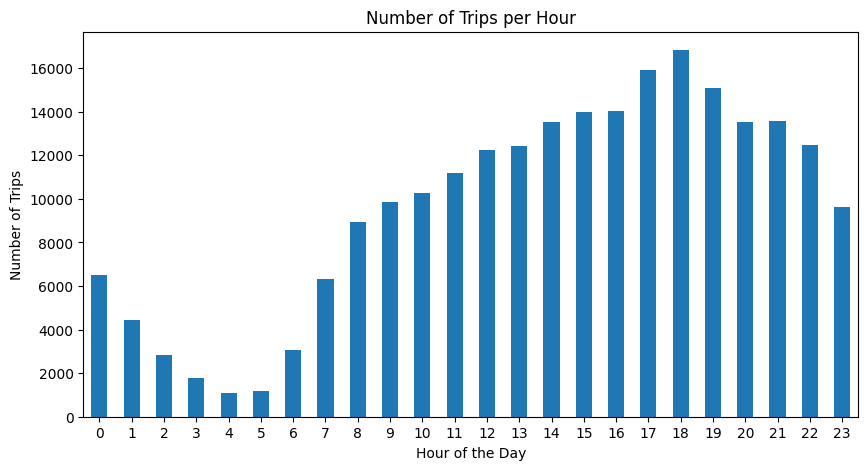

In [942]:
# Visualise the number of trips per hour and find the busiest hour
trips_per_hour = zones_df.groupby('pickup_hour').size()
plt.figure(figsize=(10, 5))
trips_per_hour.plot(kind='bar')
plt.title('Number of Trips per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
plt.show()


In [944]:
busiest_hour = trips_per_hour.idxmax()
busiest_hour

18

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

In [946]:

actual_busyhour = actual_number.max()
plt.figure(figsize=(10, 5))
actual_number.plot(kind='bar')
plt.title('Number of Trips per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
plt.show()

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [948]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.5
actual_number = trips_per_hour * (1 / 0.05)
actual_number.sort_values(ascending=False).head(5)

pickup_hour
18    336580.0
17    318060.0
19    302020.0
16    281080.0
15    279340.0
dtype: float64

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [950]:
# Compare traffic trends for the week days and weekends
zones_df['weekend'] = zones_df['pickup_day'].isin(['Saturday', 'Sunday'])
hourly_traffic = zones_df.groupby(['pickup_hour', 'weekend'])['trip_distance'].count().reset_index()
hourly_traffic['actual_trips'] = hourly_traffic['trip_distance'] / sample_fraction

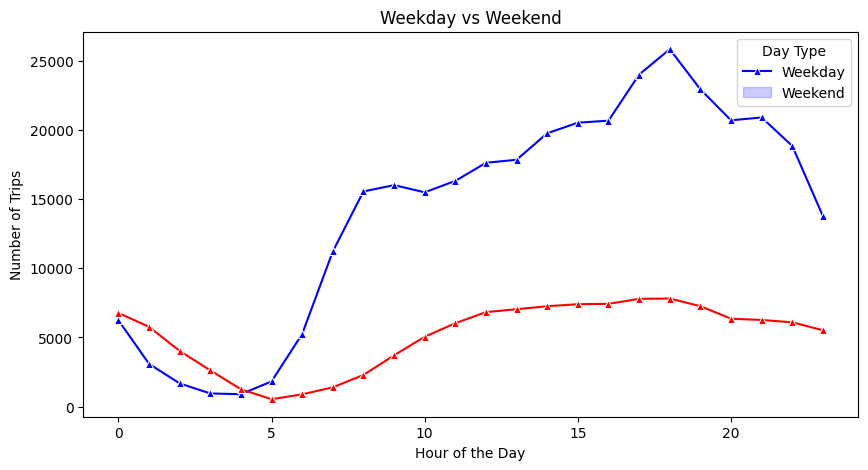

In [952]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=hourly_traffic, x='pickup_hour', y='actual_trips', hue='weekend', marker="^",palette={True: 'red', False: 'blue'})
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.title('Weekday vs Weekend')
plt.legend(title='Day Type',labels=['Weekday', 'Weekend'])
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

-The number of trips for weekdays is high during morning i.e. between 7 to 9 and is at its peak during evening hours i.e. between 16 and 20, while for the weekends, the demand is the same from morning 10 till evening 19 and slowly declines after that probably indicating people who are leasure travelling to malls,movies,shopping etc. 

-By finding busy and quiet hours for each day taxis can be better allocated at particular day of week, and hour of the day ensuring better fare revenue and surcharges, avoiding high traffic routes to save time and fuel and also less waiting time for both driver and customer.

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [954]:
# Find top 10 pickup and dropoff zones
hourly_pickup = zones_df.groupby(['pickup_hour', 'PULocationID']).size().reset_index(name='pickup_count')
hourly_drop = zones_df.groupby(['pickup_hour', 'DOLocationID']).size().reset_index(name='drop_count')
total_pickup = hourly_pickup.groupby('PULocationID')['pickup_count'].sum().reset_index()
total_drop = hourly_drop.groupby('DOLocationID')['drop_count'].sum().reset_index()
top_pickup_zones = total_pickup.sort_values(by='pickup_count', ascending=False).head(10)['PULocationID']
top_drop_zones = total_drop.sort_values(by='drop_count', ascending=False).head(10)['DOLocationID']
hourly_pickup_top = hourly_pickup[hourly_pickup['PULocationID'].isin(top_pickup_zones)]
hourly_drop_top = hourly_drop[hourly_drop['DOLocationID'].isin(top_drop_zones)]
pickup_pivot = hourly_pickup_top.pivot_table(index='pickup_hour', columns='PULocationID', values='pickup_count', aggfunc='sum')
dropoff_pivot = hourly_drop_top.pivot_table(index='pickup_hour', columns='DOLocationID', values='drop_count', aggfunc='sum')


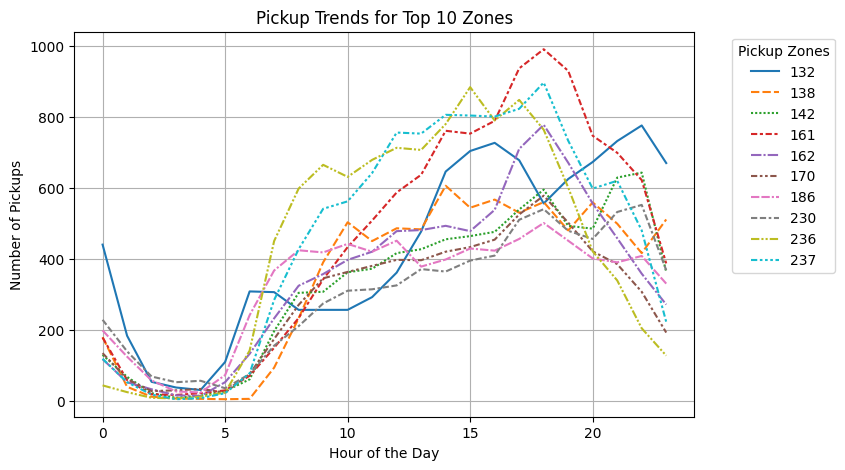

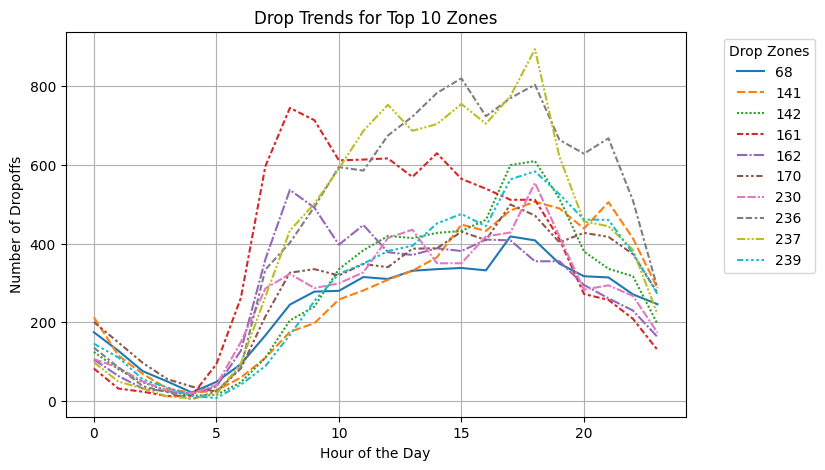

In [956]:
plt.figure(figsize=(8, 5))
sns.lineplot(data=pickup_pivot)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.title('Pickup Trends for Top 10 Zones')
plt.legend(title='Pickup Zones', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
sns.lineplot(data=dropoff_pivot)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Dropoffs')
plt.title('Drop Trends for Top 10 Zones')
plt.legend(title='Drop Zones', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [958]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
pickup_count = zones_df.groupby('PULocationID').size().reset_index(name='pickup_count')
drop_count = zones_df.groupby('DOLocationID').size().reset_index(name='drop_count')
pickup_drop_df = pd.merge(pickup_count, drop_count, how='outer', left_on='PULocationID', right_on='DOLocationID')
pickup_drop_df['pickup_drop_ratio'] = pickup_drop_df['pickup_count'] / pickup_drop_df['drop_count']
top10_ratios = pickup_drop_df.sort_values(by='pickup_drop_ratio', ascending=False).head(10)
bottom10_ratios = pickup_drop_df.sort_values(by='pickup_drop_ratio', ascending=True).head(10)
top10_ratios

PULocationID  pickup_count  DOLocationID  drop_count  pickup_drop_ratio
66           70.0        1032.0            70          83          12.433735
123         132.0       10151.0           132        2412           4.208541
129         138.0        8158.0           138        3157           2.584099
53           56.0          20.0            56          10           2.000000
175         186.0        7828.0           186        4757           1.645575
40           43.0        3868.0            43        2742           1.410649
105         114.0        3317.0           114        2359           1.406104
236         249.0        5539.0           249        4191           1.321642
152         162.0        8413.0           162        6637           1.267591
95          100.0        3532.0           100        2815           1.254707

In [960]:
bottom10_ratios

PULocationID  pickup_count  DOLocationID  drop_count  pickup_drop_ratio
188         200.0           1.0           200          66           0.015152
11           14.0           2.0            14         122           0.016393
243         257.0           2.0           257         105           0.019048
155         165.0           1.0           165          42           0.023810
33           36.0           4.0            36         165           0.024242
0             1.0          19.0             1         646           0.029412
79           83.0           1.0            83          34           0.029412
239         252.0           1.0           252          33           0.030303
67           71.0           1.0            71          29           0.034483
51           54.0           2.0            54          57           0.035088

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [962]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
night_hours = zones_df[(df['pickup_hour'] >= 23) | (zones_df['pickup_hour'] <= 5)]
pickup_night = night_hours.groupby('PULocationID').size().reset_index(name='pickup_count')
drop_night = night_hours.groupby('DOLocationID').size().reset_index(name='drop_count')
pickup_drop = pd.merge(pickup_night, drop_night, how='outer', left_on='PULocationID', right_on='DOLocationID')
top_pickup = pickup_drop.sort_values(by='pickup_count', ascending=False).head(10)
top_drop = pickup_drop.sort_values(by='drop_count', ascending=False).head(10)
top_pickup

C:\Users\KRISHNA\AppData\Local\Temp\ipykernel_4872\2457041133.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  night_hours = zones_df[(df['pickup_hour'] >= 23) | (zones_df['pickup_hour'] <= 5)]


PULocationID  pickup_count  DOLocationID  drop_count
65           79.0        1763.0            79         939
209         249.0        1422.0           249         586
107         132.0        1226.0           132         270
39           48.0        1129.0            48         764
123         148.0        1104.0           148         471
91          114.0         997.0           114         299
191         230.0         860.0           230         555
154         186.0         785.0           186         466
88          107.0         735.0           107         704
133         161.0         715.0           161         663

In [964]:
top_drop

PULocationID  pickup_count  DOLocationID  drop_count
65           79.0        1763.0            79         939
141         170.0         577.0           170         809
197         236.0         568.0           236         767
39           48.0        1129.0            48         764
56           68.0         707.0            68         749
116         141.0         533.0           141         711
88          107.0         735.0           107         704
133         161.0         715.0           161         663
200         239.0         440.0           239         655
198         237.0         652.0           237         622

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [966]:
# Filter for night hours (11 PM to 5 AM)
nighttime_hours=(zones_df['pickup_hour'] >= 23) | (df['pickup_hour'] <= 5)
daytime_hours=~nighttime_hours
nighttime_revenue = zones_df[nighttime_hours]['total_amount'].sum()
daytime_revenue = zones_df[daytime_hours]['total_amount'].sum()
total_revenue = nighttime_revenue + daytime_revenue
nighttime_revenue_share = nighttime_revenue / total_revenue * 100
daytime_revenue_share = daytime_revenue / total_revenue * 100
print(f"Revenue Share for nightime is: {nighttime_revenue_share:.2f}%")
print(f"Revenue Share for Daytime is: {daytime_revenue_share:.2f}%")

Revenue Share for nightime is: 11.94%
Revenue Share for Daytime is: 88.06%


C:\Users\KRISHNA\AppData\Local\Temp\ipykernel_4872\1576167634.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nighttime_revenue = zones_df[nighttime_hours]['total_amount'].sum()
C:\Users\KRISHNA\AppData\Local\Temp\ipykernel_4872\1576167634.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  daytime_revenue = zones_df[daytime_hours]['total_amount'].sum()


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [968]:
# Analyse the fare per mile per passenger for different passenger counts
zones_df['fare_per_mile'] = zones_df['fare_amount'] / zones_df['trip_distance']
zones_df['fare_per_mile_per_passenger'] = zones_df['fare_per_mile'] / zones_df['passenger_count']
avg_fare_per_passenger = zones_df.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()
avg_fare_per_passenger

passenger_count  fare_per_mile_per_passenger
0              1.0                    10.489471
1              2.0                     5.964065
2              3.0                     3.542428
3              4.0                     6.096160
4              5.0                     1.711247
5              6.0                     1.352973

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [970]:
# Compare the average fare per mile for different days and for different times of the day
avg_fare_per_hour = zones_df.groupby('pickup_hour')['fare_per_mile'].mean().reset_index()
avg_fare_per_day = zones_df.groupby('pickup_day')['fare_per_mile'].mean().reset_index()
avg_fare_per_hour

pickup_hour  fare_per_mile
0             0      10.917607
1             1      10.060079
2             2       9.692919
3             3      10.658498
4             4      17.077734
5             5      11.773839
6             6       9.165984
7             7      11.215161
8             8       9.483949
9             9      10.187337
10           10      11.030347
11           11      11.090778
12           12      11.580111
13           13       9.734016
14           14      11.376542
15           15      12.245179
16           16      15.178578
17           17      12.818627
18           18      10.519191
19           19      10.283013
20           20       9.973055
21           21       8.697154
22           22       9.644730
23           23       9.107648

In [972]:
avg_fare_per_day

pickup_day  fare_per_mile
0     Friday      10.847319
1     Monday      11.036929
2   Saturday      10.025369
3     Sunday      11.750913
4   Thursday      11.002299
5    Tuesday      11.031182
6  Wednesday      10.726108

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

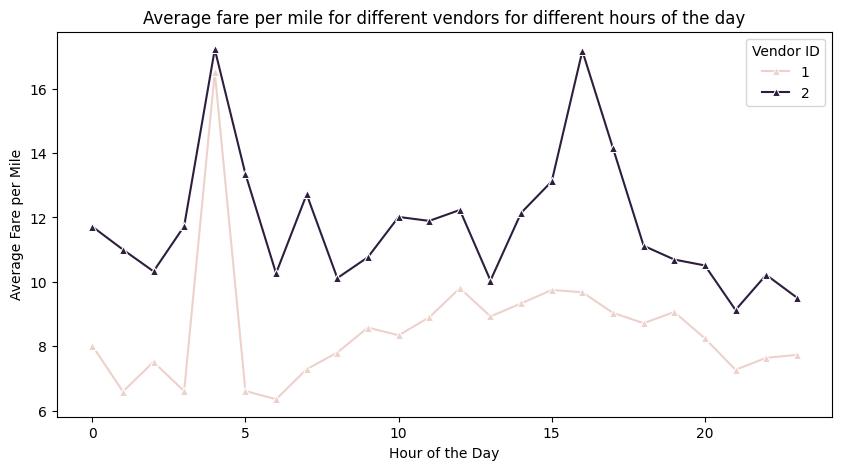

In [974]:
# Compare fare per mile for different vendors
avg_fare_per_vendor_hour = zones_df.groupby(['VendorID', 'pickup_hour'])['fare_per_mile'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(data=avg_fare_per_vendor_hour, x='pickup_hour', y='fare_per_mile', hue='VendorID', marker="^")
plt.xlabel('Hour of the Day')
plt.ylabel('Average Fare per Mile')
plt.title('Average fare per mile for different vendors for different hours of the day')
plt.legend(title='Vendor ID')
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


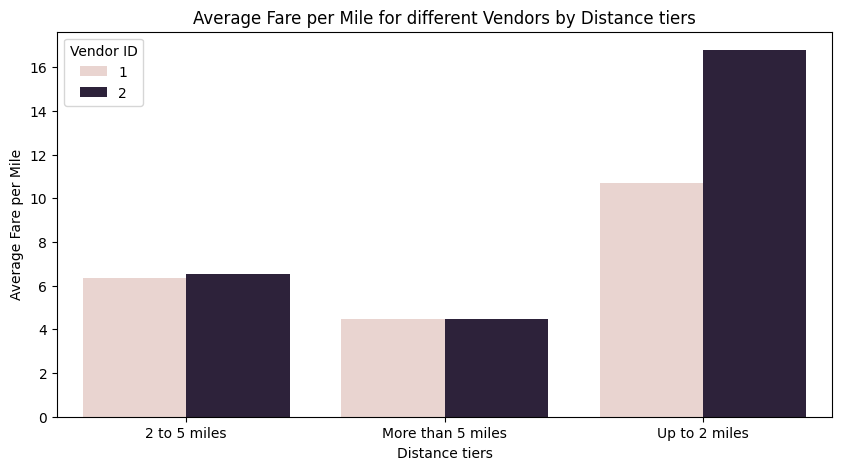

In [976]:
# Defining distance tiers
def distance_tiers(dist):
    if dist <= 2:
        return 'Up to 2 miles'
    elif 2 < dist <= 5:
        return '2 to 5 miles'
    else:
        return 'More than 5 miles'

zones_df['dist_tiers'] = zones_df['trip_distance'].apply(distance_tiers)
avg_fare_per_vendor_dist= zones_df.groupby(['VendorID', 'dist_tiers'])['fare_per_mile'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=avg_fare_per_vendor_dist, x='dist_tiers', y='fare_per_mile', hue='VendorID')
plt.xlabel('Distance tiers')
plt.ylabel('Average Fare per Mile')
plt.title('Average Fare per Mile for different Vendors by Distance tiers')
plt.legend(title='Vendor ID')
plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

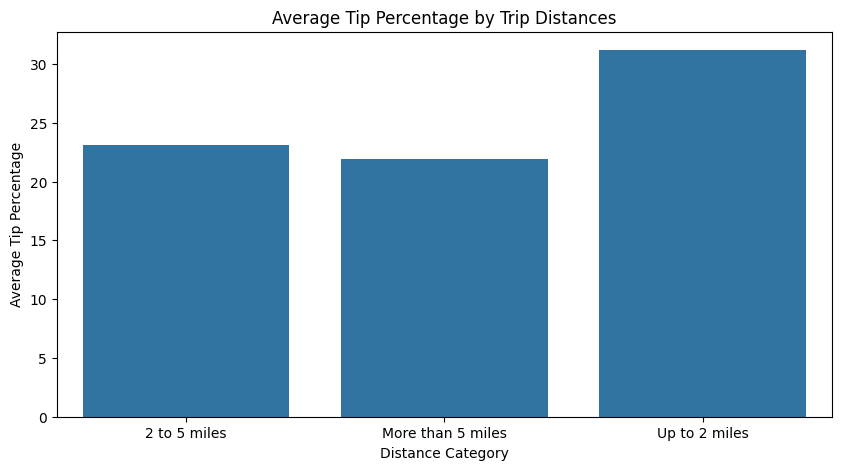

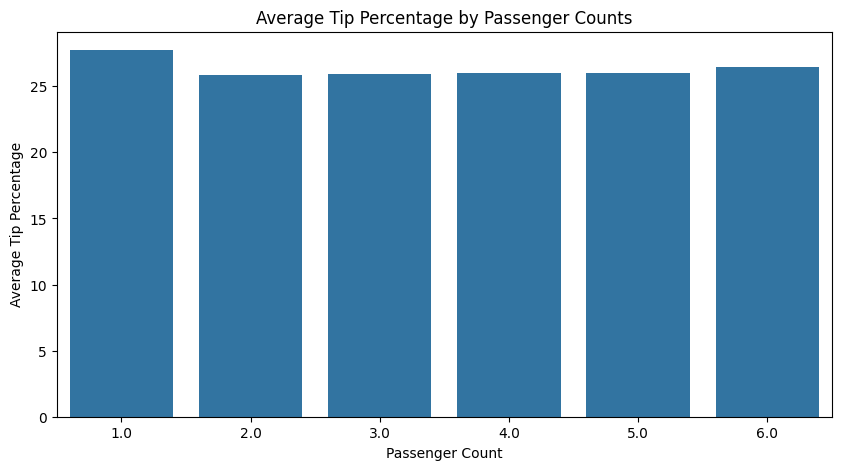

In [978]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

zones_df['tip_percentage'] = (zones_df['tip_amount'] / zones_df['fare_amount']) * 100
tip_by_distance = zones_df.groupby('dist_tiers')['tip_percentage'].mean().reset_index()
tip_by_passenger = zones_df.groupby('passenger_count')['tip_percentage'].mean().reset_index()
tip_by_hour = zones_df.groupby('pickup_hour')['tip_percentage'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=tip_by_distance, x='dist_tiers', y='tip_percentage')
plt.title('Average Tip Percentage by Trip Distances')
plt.xlabel('Distance Category')
plt.ylabel('Average Tip Percentage')
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(data=tip_by_passenger, x='passenger_count', y='tip_percentage')
plt.title('Average Tip Percentage by Passenger Counts')
plt.xlabel('Passenger Count')
plt.ylabel('Average Tip Percentage')
plt.show()

plt.figure(figsize=(10, 5))
sns.lineplot(data=tip_by_hour, x='pickup_hour', y='tip_percentage', marker='^')
plt.title('Average Tip Percentage by time of Pickup')
plt.xlabel('Hour of Pickup')
plt.ylabel('Average Tip Percentage')
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [886]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

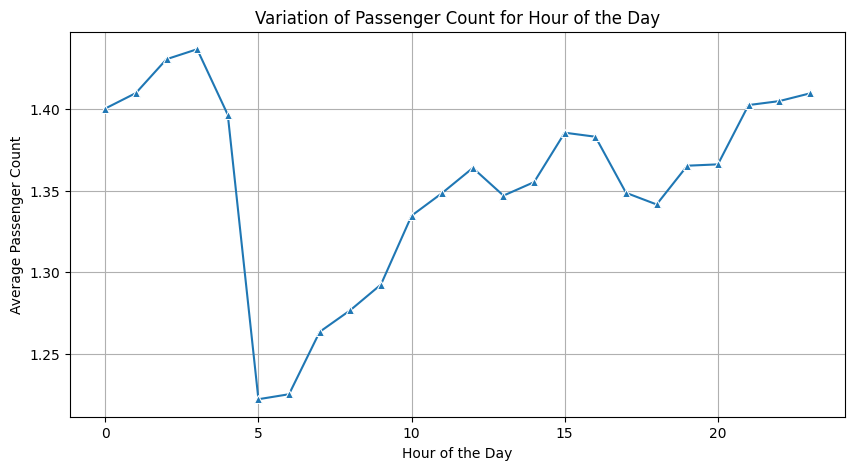

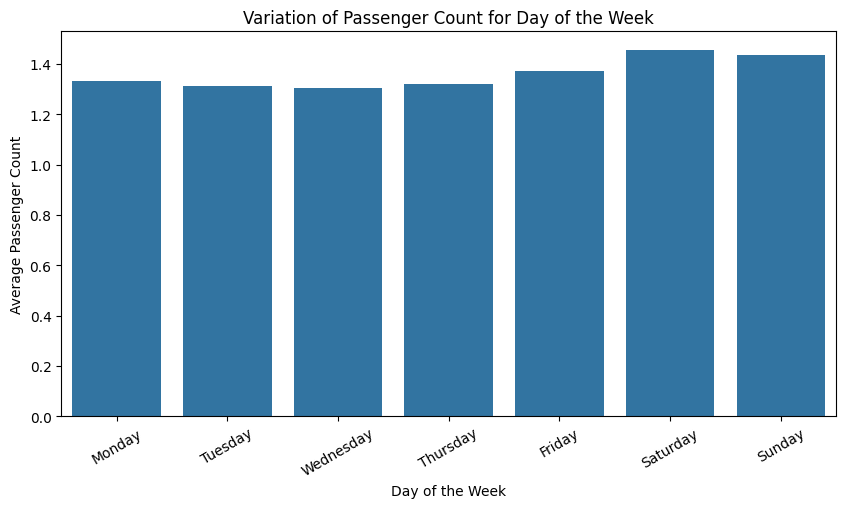

In [980]:
# See how passenger count varies across hours and days

hourly_passenger_count = zones_df.groupby('pickup_hour')['passenger_count'].mean().reset_index()
daily_passenger_count = zones_df.groupby('pickup_day')['passenger_count'].mean().reset_index()
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_passenger_count['pickup_day'] = pd.Categorical(daily_passenger_count['pickup_day'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
daily_passenger_count = daily_passenger_count.sort_values('pickup_day')

plt.figure(figsize=(10, 5))
sns.lineplot(data=hourly_passenger_count, x='pickup_hour', y='passenger_count', marker='^')
plt.title('Variation of Passenger Count for Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Passenger Count')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(data=daily_passenger_count, x='pickup_day', y='passenger_count')
plt.title('Variation of Passenger Count for Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Passenger Count')
plt.xticks(rotation=30)
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

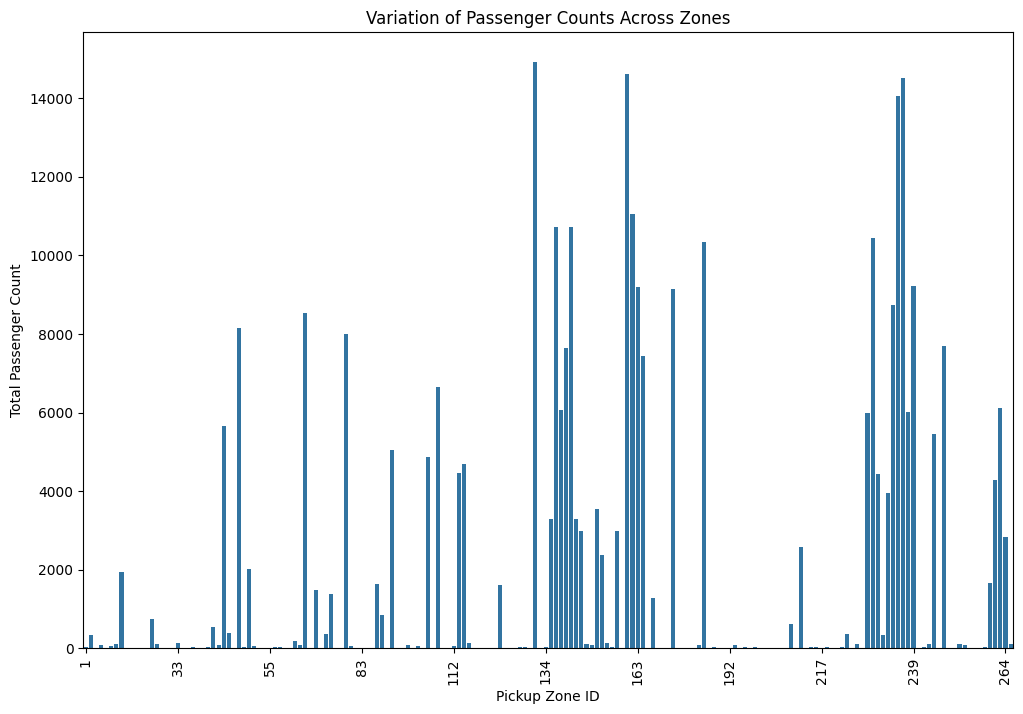

In [982]:
# How does passenger count vary across zones
passenger_zone = zones_df.groupby('PULocationID')['passenger_count'].sum().reset_index()
passenger_zone_sorted = passenger_zone.sort_values(by='passenger_count', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='PULocationID', y='passenger_count', data=passenger_zone_sorted)
plt.xlabel('Pickup Zone ID')
plt.ylabel('Total Passenger Count')
plt.title('Variation of Passenger Counts Across Zones')
plt.xticks(ticks=range(0, len(passenger_zone_sorted), len(passenger_zone_sorted)//10),rotation=90)
plt.show()

In [984]:
zones.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB


In [986]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
average_passenger_count = zones_df.groupby('PULocationID')['passenger_count'].mean().reset_index()
zones = zones.merge(average_passenger_count, left_on='LocationID', right_on='PULocationID', how='left')
zones.rename(columns={'passenger_count': 'avg_passenger_count'}, inplace=True)


In [988]:
surcharge = zones_df[zones_df['extra'] > 0].shape[0]
total_trips = zones_df.shape[0]
surcharge_percentage = (surcharge / total_trips) * 100

Find out how often surcharges/extra charges are applied to understand their prevalance

In [990]:
print(f"Total Trips with Surcharge: {surcharge}")
print(f"Percentage of Trips with Surcharge: {surcharge_percentage:.2f}%")

Total Trips with Surcharge: 143060
Percentage of Trips with Surcharge: 62.02%


**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

<Figure size 1000x500 with 0 Axes>

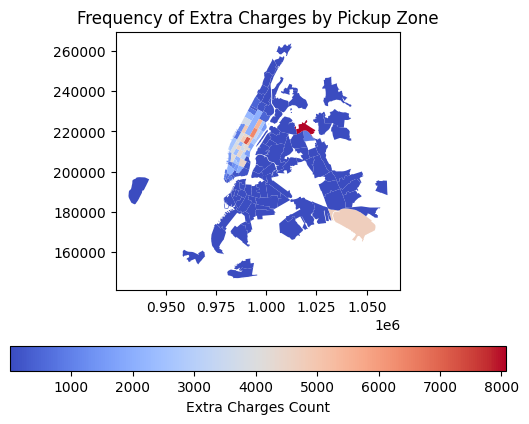

In [1014]:
# How often is each surcharge applied?
extra_charges = zones_df[zones_df['extra'] > 0]
pickup_zone_extra_charges = extra_charges.groupby('PULocationID').size().reset_index(name='extra_charges_count')
zones_extra_charges = zones.merge(pickup_zone_extra_charges, left_on='LocationID', right_on='PULocationID', how='left')
plt.figure(figsize=(10, 5))
zones_extra_charges.plot(column='extra_charges_count', cmap='coolwarm', legend=True, legend_kwds={'label': "Extra Charges Count", 'orientation': "horizontal"})
plt.title('Frequency of Extra Charges by Pickup Zone')
plt.show()

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

- As the peak hours are between 11:00 am and 03:00 pm, more cabs need to be dispatched during these hours to meet the demand.
- Maximizing round trips where the passenger counts/demand is high and where the pickup and drop is in the same zone, ensuring that no cab returns empty in such zones. One such example can be airport zone, where once a drop-off is done, there is also a high pick-up demand and the cab should not return empty.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

- As major revenue share of 88.06% is generated during daytime, we should ensure that maximum number of cabs are available at this time. This would also help reduce the passenger wait time, ensuring good service.
- Since the revenue generated at night is less and the passenger count variation is high, the number of cabs dispatched should be minimum. At the same time also ensuring more cabs needs to be positioned at high demand zones at night.
- Q2 and Q4 being the busiest quarters, number of cabs dispatched should be higher during these months.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

- No surcharge/extra amount to be levied during peak hours to attract more demand (during daytime and top pick-up/drop-off zones).
- Surcharge or extra mount needs to be levied during non-peak hours and in the bottom pick-up/drop-off zones to compensate on the loss of revenue if a cab returns empty from the drop-off location.